In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [15]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search
    

In [16]:
from duckduckgo_search import ddg_images
from fastcore.all import *


def search(term,max_images=50):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

Searching for 'fox photos'
Searching for 'wolf photos'
Searching for 'dogs photos'


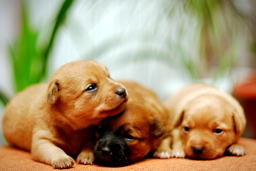

In [17]:
url=search('fox photos',max_images=1)
url[0]

from fastdownload import download_url
from fastai.vision.all import *
dest = 'fox.jpg'
download_url(url[0], dest, show_progress=False)
im = Image.open(dest)
im.to_thumb(256,256)

download_url(search('wolf photos', max_images=1)[0], 'wolf.jpg', show_progress=False)
Image.open('wolf.jpg').to_thumb(256,256)

download_url(search('dogs photos', max_images=1)[0], 'dogs.jpg', show_progress=False)
Image.open('dogs.jpg').to_thumb(256,256)





In [47]:
searches = 'fox','wolf','dogs'
path =Path('fox_or_wolf_or_dog')
from time import sleep

for i in searches:
    dest=(path/i)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest,urls=search(f'{i} photo'))
    sleep(10)
    download_images(dest,urls=search(f'{i} color photo'))
    sleep(10)
    download_images(dest,urls=search(f'{i} nose photo'))
    sleep(10)
    download_images(dest,urls=search(f'{i} in snow photo'))
    sleep(10)
    download_images(dest,urls=search(f'{i} tail photo'))
    resize_images(path/i, max_size=400, dest=path/i)
    
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)




Searching for 'fox photo'
Searching for 'fox color photo'
Searching for 'fox nose photo'
Searching for 'fox in snow photo'
Searching for 'fox tail photo'


/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Searching for 'wolf photo'
Searching for 'wolf color photo'
Searching for 'wolf nose photo'
Searching for 'wolf in snow photo'
Searching for 'wolf tail photo'
Searching for 'dogs photo'
Searching for 'dogs color photo'
Searching for 'dogs nose photo'
Searching for 'dogs in snow photo'
Searching for 'dogs tail photo'


14

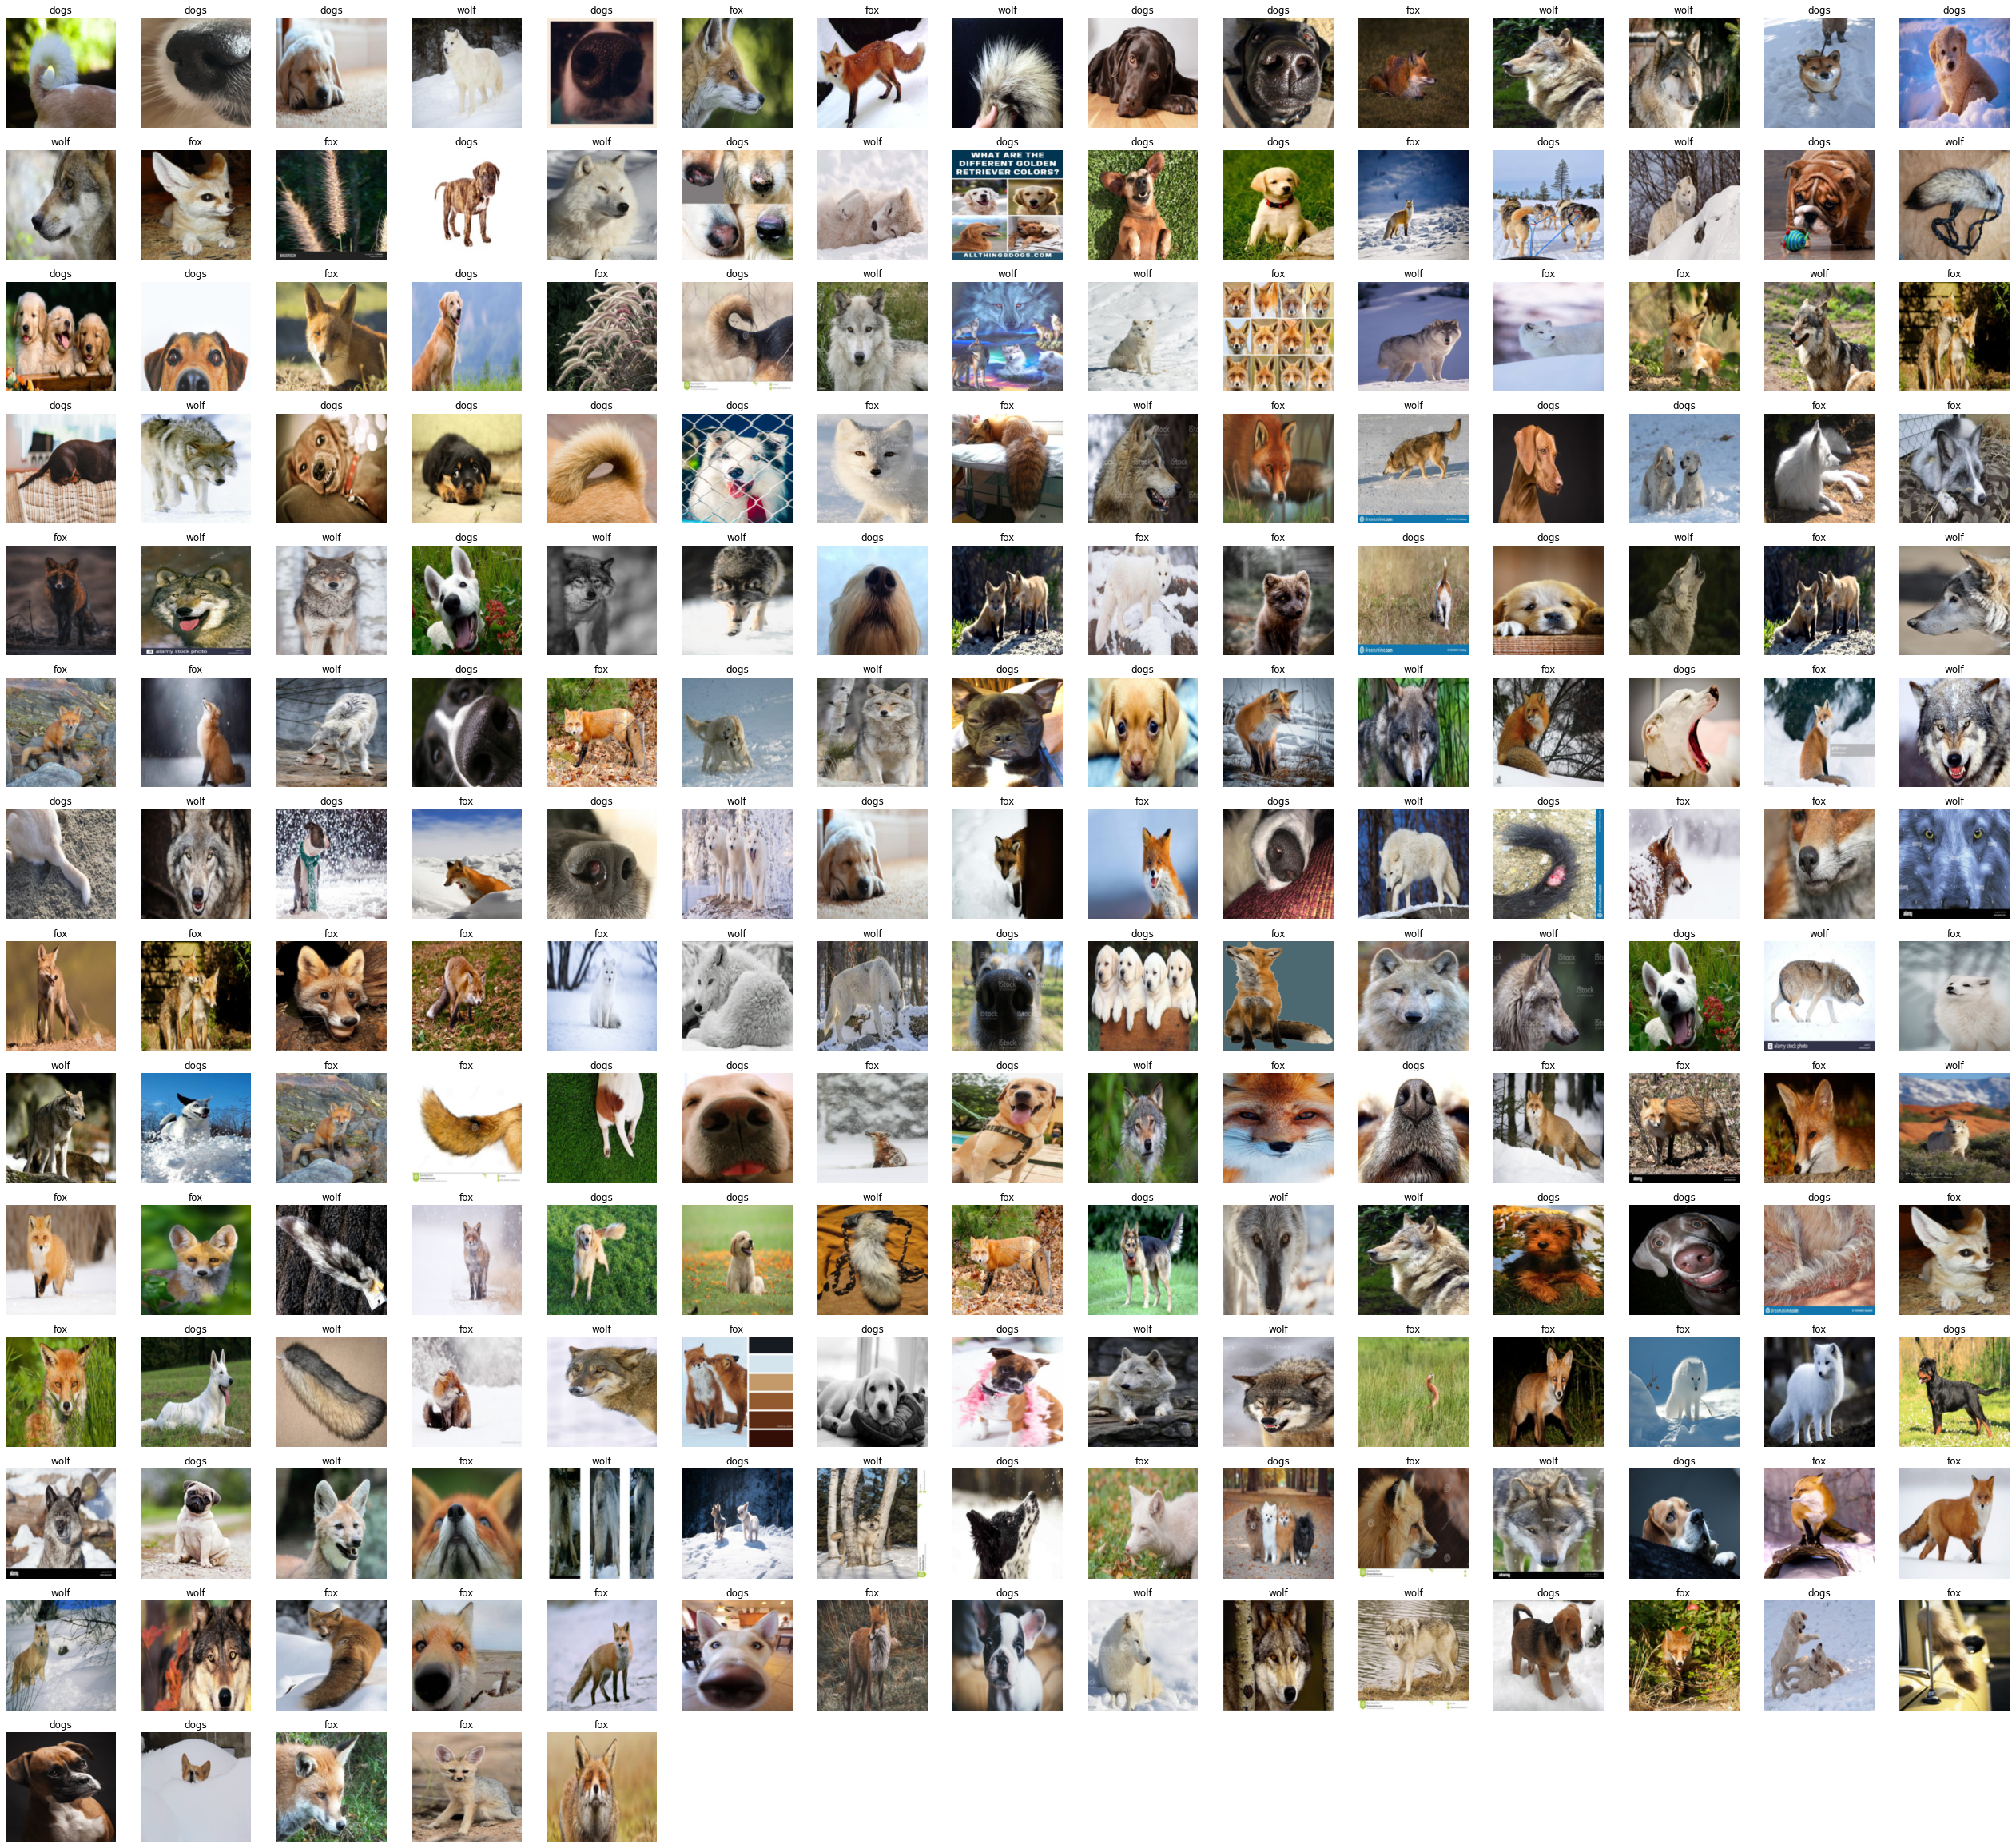

In [55]:
dls= DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y =parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=500)
dls.show_batch(max_n=200)


In [ ]:
learn = vision_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(5)

In [ ]:
dest = 'wolf1.jpg'
download_url('https://upload.wikimedia.org/wikipedia/commons/6/68/Eurasian_wolf_2.jpg', dest, show_progress=False)
im = Image.open(dest)
    
is_wolf,_,probs=learn.predict(PILImage.create('wolf1.jpg'))
print(f"This is a: {is_wolf}.")
print(f"Probability it's a wolf: {probs[0]:.4f}")

is_fox,_,probs=learn.predict(PILImage.create('wolf.jpg'))
print(f"This is a: {is_fox}.")
print(f"Probability it's a fox: {probs[0]:.4f}")

is_dogs,_,probs=learn.predict(PILImage.create('fox.jpg'))
print(f"This is a: {is_dogs}.")
print(f"Probability it's a dog: {probs[0]:.4f}")




